# <center><b>**1009_GCD- Capstone_Project _Model Building**<center><b>

---
# **Table of Contents**
---
**1.** [**Installing & Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition**](#Section2)<br>
**3.** [**Feature Scaling**](#Section3)<br>
**4.** [**Model Development & Evaluation**](#Section4)<br>

   - **4.1** [**Data Preparation**](#Section4.1)<br>
   - **4.2** [**LogisticRegression**](#Section4.2)<br>
   - **4.3** [**RandomForest Classifier**](#Section4.3)<br>
   - **4.4** [**DecisionTree Classifier**](#Section4.4)<br>
   - **4.5** [**Navie Bayes**](#Section4.5)<br>
   - **4.6** [**Ada Boosting**](#Section4.6)<br>
   - **4.7** [**XG Boost Classifier**](#Section4.7)<br>
   - **4.8** [**Gradient Bosst Classifier**](#Section4.8)<br>

**5** [**Hyperparameter Tuning**](#Section5)<br>
   
   - **5.1** [**RandomizedSearchCV with RandomforestClassifier**](#Section5.1)<br>
   - **5.2** [**GridSearchCV with DecisionTree Classifier**](#Section5.2)<br>

**6** [**Tune Model With Cross Validation**](#Section6)<br>
  - **6.1** [**LogisticRegression**](#Section6.1)<br>
  - **6.2** [**Ada Boosting**](#Section6.2)<br>
  - **6.3** [**XG Boost Classifier**](#Section6.3)<br>
  - **6.4** [**Gradient Bosst Classifier**](#Section6.4)<br>

**7** [**Selecting Best Model**](#Section7)<br>
**8** [**Uploading And Cleaning of Unseendata**](#Section8)<br>
**9** [**Predict Unseendata**](#Section9)<br>
**10** [**Conclusion**](#Section10)<br>

<a name = Section1></a>
### **1. Installing & Importing Libraries**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix,roc_curve,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay ,precision_recall_curve,plot_roc_curve
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

<a name = Section2></a>
### **2. Data Acquisition**

In [ ]:
df = pd.read_csv('/content/employee_data_INSAID.csv')
df.head(2)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,salary_high,salary_low,salary_medium,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried
0,246.0,0,0,0.866838,6,0,0.134415,1,4,124467,42,0,0,1,1,0,1,0
1,134.0,0,0,0.555718,2,0,0.511041,1,3,112210,23,0,1,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           14145 non-null  float64
 1   department                14145 non-null  int64  
 2   filed_complaint           14145 non-null  int64  
 3   last_evaluation           14145 non-null  float64
 4   n_projects                14145 non-null  int64  
 5   recently_promoted         14145 non-null  int64  
 6   satisfaction              14145 non-null  float64
 7   status                    14145 non-null  int64  
 8   tenure                    14145 non-null  int64  
 9   employee_id               14145 non-null  int64  
 10  age                       14145 non-null  int64  
 11  salary_high               14145 non-null  int64  
 12  salary_low                14145 non-null  int64  
 13  salary_medium             14145 non-null  int64  
 14  gender

In [ ]:
df2=df.copy()

In [ ]:
df.drop(['employee_id'],axis =1 )

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,age,salary_high,salary_low,salary_medium,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried
0,246.0,0,0,0.866838,6,0,0.134415,1,4,42,0,0,1,1,0,1,0
1,134.0,0,0,0.555718,2,0,0.511041,1,3,23,0,1,0,1,0,0,1
2,156.0,1,1,0.474082,2,0,0.405101,1,3,24,0,0,1,1,0,0,1
3,256.0,2,0,0.961360,6,0,0.152974,1,4,51,0,1,0,1,0,1,0
4,146.0,1,0,0.507349,2,0,0.434845,1,3,23,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,1,0,0.537866,3,0,0.610841,0,3,29,0,1,0,0,1,0,1
14141,168.0,1,0,0.643553,3,0,0.489559,0,3,24,0,1,0,1,0,0,1
14142,257.0,2,0,0.722607,3,0,0.944942,0,3,27,0,0,1,0,1,0,1
14143,242.0,5,0,0.836603,4,0,0.740136,0,2,46,0,1,0,0,1,1,0


<a name = Section3></a>
### **3.Feature scaling and selection** 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['status'],axis =1))

In [ ]:
x = pd.DataFrame(data=X_scaled, columns=df.drop(['status'],axis =1).columns)
y= df['status']

In [ ]:
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators = 10, random_state = 42))
selector.fit(x, y)

# Extracting list of important features
selected_feat = x.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 6
Threshold set by Model: 0.06
Important Features: ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure', 'employee_id']


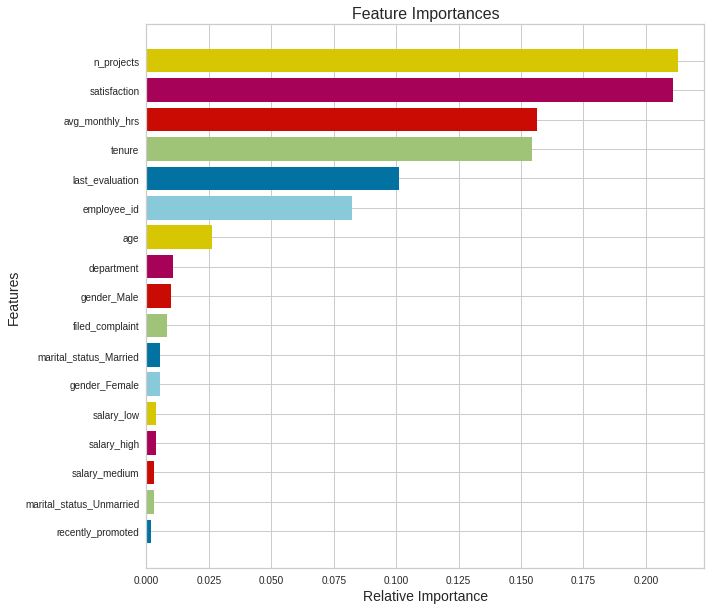

In [ ]:
figure = plt.figure(figsize=[10,10])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

<a name = Section4></a>
# **4. Model Development & Evaluation**


- In this section, we will develop Logistic Regression and Stochastic Gradient Descent and compare the performance.

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.

- But in a real-life situation, one must train the model individually as then decide which model is best in which situation.

<a name = Section4.1></a>
### **4.1. Data Preparation**

In [ ]:
def model_eval(actual,predicted):
    acc_score = accuracy_score(actual , predicted)
    class_report = classification_report(actual , predicted)
    print('The accuracy of the model is : ' ,acc_score)
    print(confusion_matrix(actual,predicted))
    print(class_report)
    

In [ ]:
def confus_matrix(df):
    y_train_pred_count = df.predict(x_train)
    y_test_pred_count = df.predict(x_test)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
    plot_confusion_matrix(estimator=df, X=x_train, y_true=y_train, values_format='.7g', cmap='YlGnBu', ax=ax1)
    plot_confusion_matrix(estimator=df, X=x_test, y_true=y_test, values_format='.7g', cmap='YlGnBu', ax=ax2)
    ax1.set_title(label='Train Data', size=14)
    ax2.set_title(label='Test Data', size=14)
    ax1.grid(b=False)
    ax2.grid(b=False)
    plt.suptitle(t='Confusion Matrix', size=16)
    plt.show()

**Now we will split our data in training and testing part for further development**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=365,stratify = y )

In [ ]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (11316, 17) (11316,)
Testing Data Shape: (2829, 17) (2829,)


<a name = Section4.2></a>
### **4.2. Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_lr_train_pred = logreg.predict(x_train)
y_lr_test_pred = logreg.predict(x_test)

In [ ]:
model_eval(y_train,y_lr_train_pred)

The accuracy of the model is :  0.8134499823259103
[[8039  587]
 [1524 1166]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8626
           1       0.67      0.43      0.52      2690

    accuracy                           0.81     11316
   macro avg       0.75      0.68      0.70     11316
weighted avg       0.80      0.81      0.80     11316



In [ ]:
model_eval(y_test,y_lr_test_pred)

The accuracy of the model is :  0.8168964298338636
[[2013  143]
 [ 375  298]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      2156
           1       0.68      0.44      0.54       673

    accuracy                           0.82      2829
   macro avg       0.76      0.69      0.71      2829
weighted avg       0.80      0.82      0.80      2829



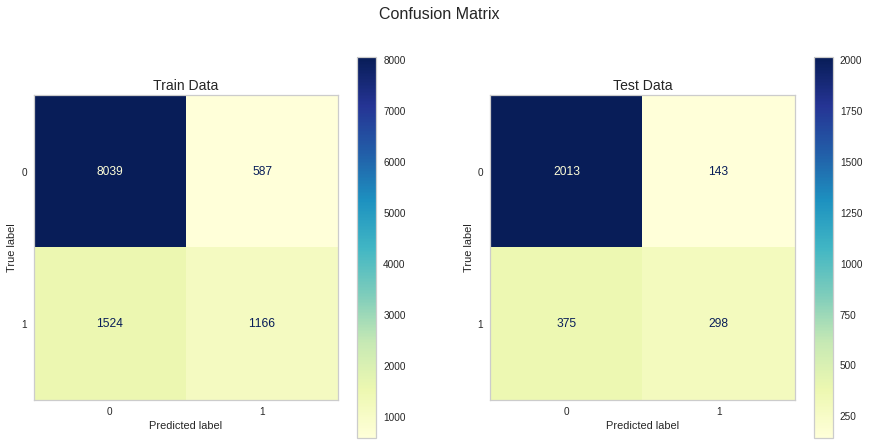

In [ ]:
confus_matrix(logreg)

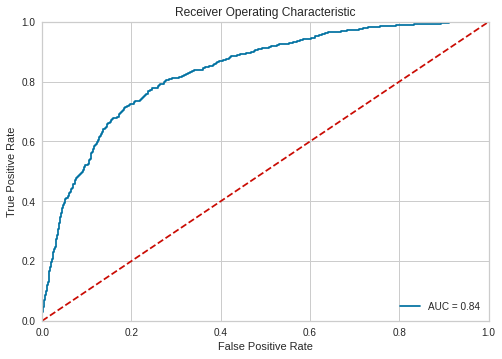

In [ ]:
from sklearn import metrics

probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section4.3></a>
### **4.3. RandomForest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth=7,n_jobs=-1)
rf.fit(x_train,y_train)
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
model_eval(y_train,y_rf_train_pred)

The accuracy of the model is :  0.9779957582184517
[[8567   59]
 [ 190 2500]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8626
           1       0.98      0.93      0.95      2690

    accuracy                           0.98     11316
   macro avg       0.98      0.96      0.97     11316
weighted avg       0.98      0.98      0.98     11316



In [ ]:
model_eval(y_test,y_rf_test_pred)

The accuracy of the model is :  0.9699540473665607
[[2137   19]
 [  66  607]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2156
           1       0.97      0.90      0.93       673

    accuracy                           0.97      2829
   macro avg       0.97      0.95      0.96      2829
weighted avg       0.97      0.97      0.97      2829



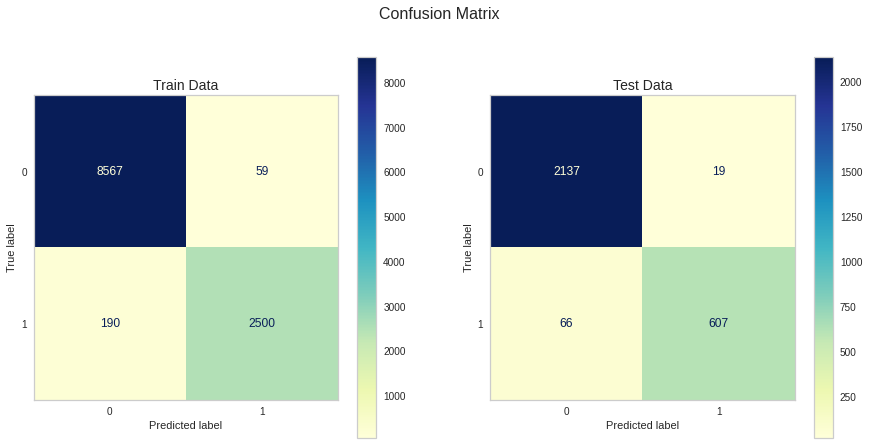

In [ ]:
confus_matrix(rf)

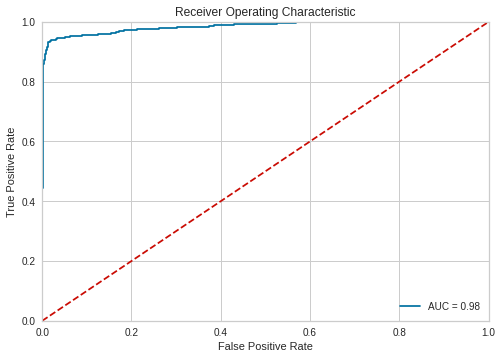

In [ ]:
from sklearn import metrics

probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section4.4></a>
### **4.4. Decision Tree Classifier**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [ ]:
model_eval(y_train,preds_dtree_train)

The accuracy of the model is :  1.0
[[8626    0]
 [   0 2690]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8626
           1       1.00      1.00      1.00      2690

    accuracy                           1.00     11316
   macro avg       1.00      1.00      1.00     11316
weighted avg       1.00      1.00      1.00     11316



In [ ]:
model_eval(y_test,preds_dtree_test)

The accuracy of the model is :  0.9621774478614351
[[2099   57]
 [  50  623]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2156
           1       0.92      0.93      0.92       673

    accuracy                           0.96      2829
   macro avg       0.95      0.95      0.95      2829
weighted avg       0.96      0.96      0.96      2829



<a name = Section4.5</a>
### **4.5. Naive Bayes**

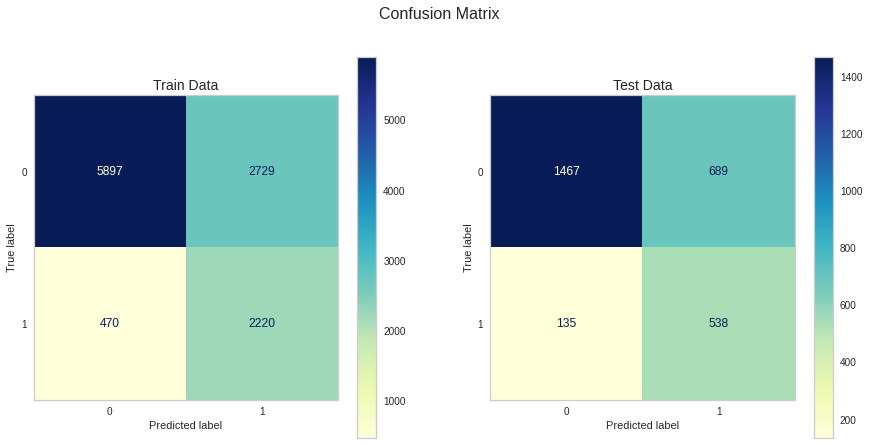

In [ ]:
naive = GaussianNB()
naive.fit(x_train, y_train)

y_train_pred_count = naive.predict(x_train)
y_test_pred_count = naive.predict(x_test)

y_train_pred_proba = naive.predict_proba(x_train)
y_test_pred_proba = naive.predict_proba(x_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = x_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = x_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [ ]:
model_eval(y_test,y_test_pred_count)

The accuracy of the model is :  0.7087310003534818
[[1467  689]
 [ 135  538]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2156
           1       0.44      0.80      0.57       673

    accuracy                           0.71      2829
   macro avg       0.68      0.74      0.67      2829
weighted avg       0.80      0.71      0.73      2829



<a name = Section4.6></a>
### **4.6 Ada boosting**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_ada_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_ada_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9381406857546837
[[2087   69]
 [ 106  567]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2156
           1       0.89      0.84      0.87       673

    accuracy                           0.94      2829
   macro avg       0.92      0.91      0.91      2829
weighted avg       0.94      0.94      0.94      2829

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.9443266171792153
[[8373  253]
 [ 377 2313]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8626
           1       0.90      0.86      0.88      2690

    accuracy                           0.94     11316
   macro avg       0.93      0.92      0.92     11316
weig

<a name = Section4.7></a>
### **4.7 XG Boost Classifier**

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_xgb_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_xgb_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9706610109579357
[[2130   26]
 [  57  616]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2156
           1       0.96      0.92      0.94       673

    accuracy                           0.97      2829
   macro avg       0.97      0.95      0.96      2829
weighted avg       0.97      0.97      0.97      2829

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.9764934605867798
[[8540   86]
 [ 180 2510]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8626
           1       0.97      0.93      0.95      2690

    accuracy                           0.98     11316
   macro avg       0.97      0.96      0.97     11316
weig

<a name = Section4.8></a>
### **4.8 GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=7)
gbc.fit(x_train, y_train)
preds_gbc_train = gbc.predict(x_train)
preds_gbc_test = gbc.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_gbc_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_gbc_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9812654648285614
[[2145   11]
 [  42  631]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2156
           1       0.98      0.94      0.96       673

    accuracy                           0.98      2829
   macro avg       0.98      0.97      0.97      2829
weighted avg       0.98      0.98      0.98      2829

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.999204665959703
[[8622    4]
 [   5 2685]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8626
           1       1.00      1.00      1.00      2690

    accuracy                           1.00     11316
   macro avg       1.00      1.00      1.00     11316
weigh


<a name = Section5></a>
# **5. Hyperparameter Tuning** 

<a name = Section5.1></a>
### **5.1 RandomizedSearchCV With RandomForest**

In [ ]:
params = {
    'max_depth':[5,10,20,30],
    'max_leaf_nodes':[16,32,64,128],
    'min_samples_leaf':[10,20,30,40,60,80]
}
rf_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,random_state=42,
                                                                 class_weight='balanced'),
                                param_distributions=params,
                                 n_jobs = -1,
                                 random_state=42,
                                 scoring='roc_auc'
                                )
rf_search_cv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, 30],
                                        'max_leaf_nodes': [16, 32, 64, 128],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             80]},
                   random_state=42, scoring='roc_auc')

In [ ]:
y_rscv_train_pred = rf_search_cv.predict(x_train)
y_rscv_test_pred = rf_search_cv.predict(x_test)

In [ ]:
model_eval(y_test,y_rscv_test_pred)

The accuracy of the model is :  0.9717214563449982
[[2128   28]
 [  52  621]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2156
           1       0.96      0.92      0.94       673

    accuracy                           0.97      2829
   macro avg       0.97      0.95      0.96      2829
weighted avg       0.97      0.97      0.97      2829



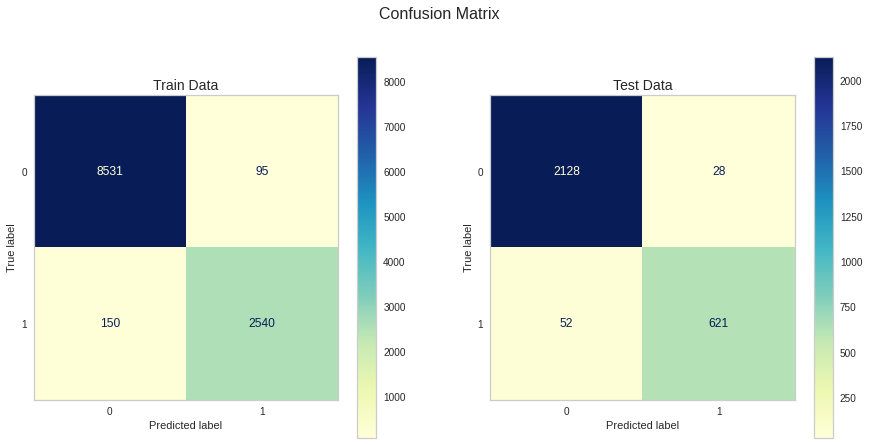

In [ ]:
confus_matrix(rf_search_cv)

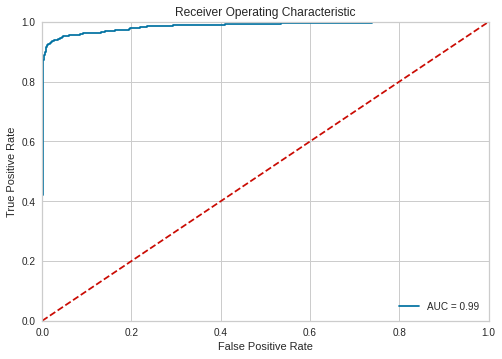

In [ ]:
from sklearn import metrics

probs = rf_search_cv.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<a name = Section5.2></a>
### **5.2 GridSearchCV with Decision Tree Classifier**

In [ ]:
param_gcv = {'max_depth': [4,8,10],'min_samples_split': [2,5,10],'min_samples_leaf': [1,2,4]}

gcv = GridSearchCV(estimator = dtree,param_grid = param_gcv,cv = 5)

gcv.fit(x_train, y_train)

# Predicting training and testing labels
preds_gcv_train = gcv.predict(x_train)
preds_gcv_test = gcv.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_gcv_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_gcv_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9731353835277483
[[2136   20]
 [  56  617]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2156
           1       0.97      0.92      0.94       673

    accuracy                           0.97      2829
   macro avg       0.97      0.95      0.96      2829
weighted avg       0.97      0.97      0.97      2829

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.9848002827854365
[[8584   42]
 [ 130 2560]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8626
           1       0.98      0.95      0.97      2690

    accuracy                           0.98     11316
   macro avg       0.98      0.97      0.98     11316
weig

<a name = Section6></a>
# **6. Tune Model With Cross Validation**

<a name = Section61></a>
### **6.1 Logistic Regression**

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=2)
modelLR = LogisticRegression()
results = model_selection.cross_val_score(modelLR, x_train, y_train, cv=kfold, scoring='accuracy')
print("10-fold cross validation average Accuracy score for Logistic Regression: %.3f" % (results.mean()))

10-fold cross validation average Accuracy score for Logistic Regression: 0.813


<a name = Section6.2></a>
### **6.2 Ada boosting**

In [ ]:
score = []
for depth in [1,2,10] : 
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    scores_ada = model_selection.cross_val_score(reg_ada, x, y, cv=10)
    score.append(scores_ada.mean())
print(score)

[0.9370033636377266, 0.9717896252017934, 0.9756795497823383]


<a name = Section6.3></a>
### **6.3 GradientBoosting**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
model_gb = GradientBoostingClassifier(n_estimators=50, random_state=1, learning_rate = 0.10) 

results_gb = model_selection.cross_validate(model_gb, x,y, cv=10, scoring=scoring)

In [ ]:
results_gb_df=pd.DataFrame.from_dict(results_gb)
results_gb_df.mean()

fit_time          1.217979
score_time        0.006870
test_accuracy     0.969034
test_precision    0.957264
test_recall       0.910487
test_f1_score     0.933217
dtype: float64

<a name = Section6.4></a>
### **6.4 XGboost classifier**

In [ ]:
kfold = KFold(n_splits=10)
XGB_cv = XGBClassifier(n_estimators=100, random_state=1, learning_rate = 0.1)
results_xgb = model_selection.cross_val_score(XGB_cv, x, y, cv=kfold)

print('test accuracy: ',results_xgb.mean())

test accuracy:  0.9684727685287458


<a name = Section7></a>
# **7. Selecting Best Model**

In [ ]:
model_dict = {'Logistic Model':[accuracy_score(y_test,y_lr_test_pred),f1_score(y_test,y_lr_test_pred),precision_score(y_test,y_lr_test_pred),recall_score(y_test,y_lr_test_pred)],
            'RandomizedSearchCV(RF)' : [accuracy_score(y_test,y_rscv_test_pred),f1_score(y_test,y_rscv_test_pred),precision_score(y_test,y_rscv_test_pred),recall_score(y_test,y_rscv_test_pred)],
            'Gradient Boost Model':[accuracy_score(y_test,preds_gbc_test), f1_score(y_test,preds_gbc_test),precision_score(y_test,preds_gbc_test),recall_score(y_test,preds_gbc_test)],
            'RandomForest Model':[accuracy_score(y_test,y_rf_test_pred), f1_score(y_test,y_rf_test_pred),precision_score(y_test,y_rf_test_pred),recall_score(y_test,y_rf_test_pred)],
            'Ada Boost Model':[accuracy_score(y_test,preds_ada_test), f1_score(y_test,preds_ada_test),precision_score(y_test,preds_ada_test),recall_score(y_test,preds_ada_test)],
            'DecisionTree Model':[accuracy_score(y_test,preds_dtree_test), f1_score(y_test,preds_dtree_test),precision_score(y_test,preds_dtree_test),recall_score(y_test,preds_dtree_test)],
            'XGBoost Model':[accuracy_score(y_test,preds_xgb_test), f1_score(y_test,preds_xgb_test),precision_score(y_test,preds_xgb_test),recall_score(y_test,preds_xgb_test)],
            'Naive Bayes Model':[accuracy_score(y_test,y_test_pred_count), f1_score(y_test,y_test_pred_count),precision_score(y_test,y_test_pred_count),recall_score(y_test,y_test_pred_count)],
            'GridsearchCV Model(DT)':[accuracy_score(y_test,preds_gcv_test), f1_score(y_test,preds_gcv_test),precision_score(y_test,preds_gcv_test),recall_score(y_test,preds_gcv_test)]
                                                                                                                                    
}

In [ ]:
best_model = pd.DataFrame(model_dict, index=['Accuracy','F1','Precision','Recall'] ).T
print(" Model Comparision- On Test Data")
print("-------------------------------------------------")
best_model.round(2)*100

 Model Comparision- On Test Data
-------------------------------------------------


,Accuracy,F1,Precision,Recall
Logistic Model,82.0,54.0,68.0,44.0
RandomizedSearchCV(RF),97.0,94.0,96.0,92.0
Gradient Boost Model,98.0,96.0,98.0,94.0
RandomForest Model,97.0,93.0,97.0,90.0
Ada Boost Model,94.0,87.0,89.0,84.0
DecisionTree Model,96.0,92.0,92.0,93.0
XGBoost Model,97.0,94.0,96.0,92.0
Naive Bayes Model,71.0,57.0,44.0,80.0
GridsearchCV Model(DT),97.0,94.0,97.0,92.0


After building diffirent classification models and on comparing, the following conclusions are made for finalizing the best performing model:

- Gradient BoostClassifier give highest accuracy scores

- As the data is **imbalanced** i.e., the proportion of the staus variable "Left" is much less compared to "Employed", the **F1 score** in this case is most important to be considered.

- Gradient Boost gives higher **F1 score (96%)** compared to all models.

- Based on the above considerations, **Gradient Boost** is chosen as the final model for predicting the Unseen Data

<a name = Section8></a>
# **8. Uploading and Cleaning of Unseen Data**

In [ ]:
df_test = pd.read_csv('/content/GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv')
df_test.head(2)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
df_test.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
employee_id           0
dtype: int64

In [ ]:
emp_details_data = pd.read_csv("/content/employee_details_data.csv")

In [ ]:
test_df =df_test.merge(emp_details_data,how='left',on='employee_id')

In [ ]:
test_df.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
employee_id           0
age                   0
gender                0
marital_status        0
dtype: int64

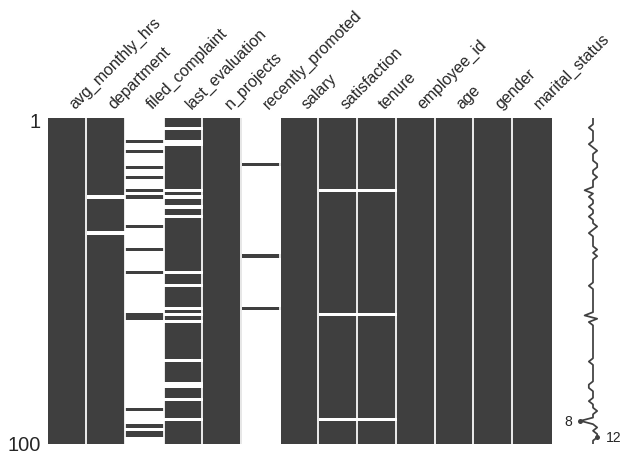

In [ ]:
import missingno as mno
mno.matrix(test_df, figsize = (10,6))
plt.show()

In [ ]:
# Correction in Department ID (-IT to D00-IT )
test_df.replace({'-IT'},{'D00-IT'},inplace =True)

In [ ]:
# We can consider null value present in Department as Unknown Department and will replace the null value with D00-UN.
test_df['department'] = np.where(test_df['department'].isna(),'D00-UN',test_df['department'])

In [ ]:
#1 indicates the employee has given complaint. So the remaining data means employees have not given complaint. 
# Hence instead of removing the column ,we will replace the NAN values with zero for better analysis.

test_df['filed_complaint'] = test_df['filed_complaint'].fillna(0)

In [ ]:
# We can replace the missing values with mean values of the respective departments.
mean = test_df.groupby(['department'])['last_evaluation'].mean()
mean_deprt = mean.to_dict()
test_df['last_evaluation'] = test_df['last_evaluation'].fillna(test_df['department'].map(mean_deprt))

In [ ]:
# Replacing the NaN value present in 'last_evaluation' column of department ID: D00-TP with Zeros(0)
test_df['last_evaluation'] = test_df['last_evaluation'].fillna(0)

In [ ]:
# 1 indicates the employee has been promoted and which means rest of the employee is not promoted yet. 
# Hence we will replace the NAN values with zero
test_df['recently_promoted'] = test_df['recently_promoted'].fillna(0)

In [ ]:
# Replacing the NaN values in tenure with '1' 
test_df['tenure'] = test_df['tenure'].replace(np.NaN,1)
test_df['satisfaction'] = test_df['satisfaction'].fillna(0)

In [ ]:
test_df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
 10  age                100 non-null    int64  
 11  gender             100 non-null    object 
 12  marital_status     100 non-null    object 
dtypes: float64(5), int64(4), object(4)
memory usage: 10.9+ KB


In [ ]:
#One-Hot Encoding
cat_feat=['salary','gender','marital_status']
new_test_df =pd.get_dummies(test_df,columns = cat_feat)

In [ ]:
#Label encoding
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['D00-UN', 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT',
       'D00-AD', 'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], ordered=True)
new_test_df['department'] = new_test_df['department'].astype(cat_type)

In [ ]:
new_test_df['department'] = new_test_df['department'].cat.codes

In [ ]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           100 non-null    int64  
 1   department                100 non-null    int8   
 2   filed_complaint           100 non-null    float64
 3   last_evaluation           100 non-null    float64
 4   n_projects                100 non-null    int64  
 5   recently_promoted         100 non-null    float64
 6   satisfaction              100 non-null    float64
 7   tenure                    100 non-null    float64
 8   employee_id               100 non-null    int64  
 9   age                       100 non-null    int64  
 10  salary_high               100 non-null    uint8  
 11  salary_low                100 non-null    uint8  
 12  salary_medium             100 non-null    uint8  
 13  gender_Female             100 non-null    uint8  
 14  gender_Male

In [ ]:
test =new_test_df.drop(columns = 'employee_id')

**Scaling Unseendata**

In [ ]:
test_scaled = scaler.transform(new_test_df)

<a name = Section9></a>
# **9. Predict Unseendata**

In [ ]:
pred_unseenData = gbc.predict(test_scaled)
unseenData_probability = gbc.predict_proba(test_scaled)
predictions_prob = unseenData_probability[:,1].round(2)

In [ ]:
predictions = pd.DataFrame(pred_unseenData, columns=['status'])
pred_prob = pd.DataFrame(predictions_prob, columns=['Probability to Leave'])

In [ ]:
predictions.head(5)

,status
0,1
1,0
2,1
3,0
4,0


In [ ]:
pred_prob.head(5)

,Probability to Leave
0,1.00
1,0.09
2,0.99
3,0.00
4,0.04


In [ ]:
employee_id = new_test_df[['employee_id']]
employee_id.head(2)

,employee_id
0,119045
1,112223


In [ ]:
submission = pd.concat([employee_id,pred_prob],axis =1)
submission.head()

,employee_id,Probability to Leave
0,119045,1.00
1,112223,0.09
2,103924,0.99
3,105922,0.00
4,103297,0.04


In [ ]:
submission.to_csv('submission_GCD_Project_1009.csv',index=False,header = False)

<a name = Section10></a>
# **10.Conclusion**

- We have seen the impact of various factors such as **age, gender, marital_status, department, salary, tenure, n_projects, avg_monthly_hrs, satisfaction, last_evaluation on the employee status**.

- We scaled our data so that one feature does not have too much weightage in explaining the target.
 
- We have performed model development using various **ML algorithm like decision tree, logistic regression,ada boosting, xgboost , navie bayes and gradient boosting**.

- After building diffirent classification models and on comparing, the following conclusions are made for finalizing the best performing model:

- **Gradient BoostClassifier** gave highest accuracy scores.

- As the data is **imbalanced i.e., the proportion of the staus variable "Left" is much less compared to "Employed", the F1 score** in this case is most important to be considered.

- **Gradient Boost gives higher F1 score (96%) compared to all models.**

- Based on the above considerations, Gradient Boost is chosen as the final model for predicting the Unseen Data.

- This model will help us to **control the employees attrition rate** in company and also help to identify which employee may likely to leave the company on the basis of **predicted probability**.

